<div style="color:black">

# **Project 6 EDA Notebook**

**Author:** Angie Crews  
**Date Due:** Friday, October 3, 2025

</div>

<div style="color:black; font-size:1em">

# **Flavors of Cacao EDA Project**

This notebook explores the "Flavors of Cacao" dataset, which contains ratings and characteristics of chocolate bars from various companies and locations around the world. We analyze cocoa percent, flavor profiles, company and bean origins, and ratings to uncover trends and insights about what makes a chocolate bar stand out.

</div>

<div style="color:black; font-size:1.5em">

<img src="https://cdn.jsdelivr.net/gh/twitter/twemoji@14.0.2/assets/svg/1f4e5.svg" alt="import icon" width="32" style="vertical-align:middle"> ***01 Imports***

</div>

In [1]:
%pip install pyarrow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import jupyterlab as jl

Note: you may need to restart the kernel to use updated packages.


<div style="color:black; font-size:1.5em">

🗂️ ***02 Data Acquisition***

</div>

In [2]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('flavors_of_cacao.csv', encoding='latin1')

# Remove the '%' and convert to float
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Show the first five rows as a table
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70.0,"2- B,S","chalky, fragrant, then off",2.50
1,999,Bahen & Co.,Australia,2012,Brazil,Bahia,70.0,"2- B,S","chalky, intense, chemical",2.50
2,999,Mast Brothers,U.S.A.,2012,Blend,Madagascar,72.0,"2- B,S","gritty, overly tart, sour",2.50
3,999,Mast Brothers,U.S.A.,2012,Venezuela,Chuao,73.0,"2- B,S","gritty, sour, sweet",2.75
4,995,Bahen & Co.,Australia,2012,Madagascar,Sambirano,70.0,"2- B,S","unrefined, flat, grassy",3.00


<div style="color:black; font-size:1.5em">

🔍 ***03 Initial Data Inspection***

</div>

In [3]:
# Display the first 10 rows
df.head(10)

# Display the shape of the DataFrame (rows, columns)
print("Shape:", df.shape)

# Display the data types of each column
print("Data types:\n", df.dtypes)

Shape: (2789, 10)
Data types:
 REF                                   int64
Company (Manufacturer)               object
Company Location                     object
Review Date                           int64
Country of Bean Origin               object
Specific Bean Origin or Bar Name     object
Cocoa Percent                       float64
Ingredients                          object
Most Memorable Characteristics       object
Rating                              float64
dtype: object


<div style="color:black; font-size:1.5em">

📊 ***04 Initial Descriptive Statistics***

</div>

In [4]:
if 'df' in globals():
	print(df[['Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics', 'Rating']].describe(include='all'))
else:
	print("DataFrame 'df' is not defined. Please run cell 4 first.")
# Make sure cell 4 (where df is defined) is executed before this cell.

        Cocoa Percent Ingredients Most Memorable Characteristics       Rating
count     2789.000000        2702                           2789  2789.000000
unique            NaN          23                           2746          NaN
top               NaN    3- B,S,C           creamy, nutty, cocoa          NaN
freq              NaN        1165                              4          NaN
mean        71.580136         NaN                            NaN     3.197024
std          5.436171         NaN                            NaN     0.438051
min         42.000000         NaN                            NaN     1.000000
25%         70.000000         NaN                            NaN     3.000000
50%         70.000000         NaN                            NaN     3.250000
75%         74.000000         NaN                            NaN     3.500000
max        100.000000         NaN                            NaN     4.000000


<div style="color:black; font-size:1em">

**Top 3 Observations from Initial Descriptive Statistics**

1. **Cocoa Percent:**  
   - The average cocoa percent is about 70%, showing most bars are dark chocolate.
   - Values range widely, from around 42% to 100%.
   - The distribution is skewed toward higher cocoa percentages.

2. **Most Memorable Characteristics:**  
   - There is a high diversity of flavor descriptors.
   - Common characteristics include "nutty", "fruity", and "earthy".
   - Some entries are missing or blank, indicating incomplete descriptions.

3. **Rating:**  
   - The average rating is close to 3.2, with most ratings between 2 and 4.
   - Ratings are tightly clustered, with few extreme scores.
   - Very few bars achieve the maximum rating of 5.

</div>

<div style="color:black; font-size:1.5em">

📊 ***05 Initial Data Distribution for Numerical Columns***

</div>

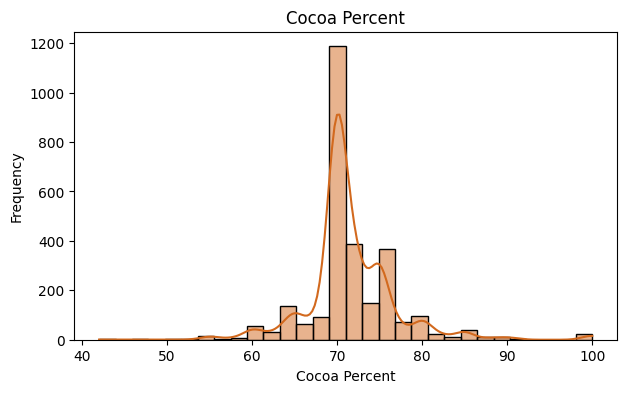

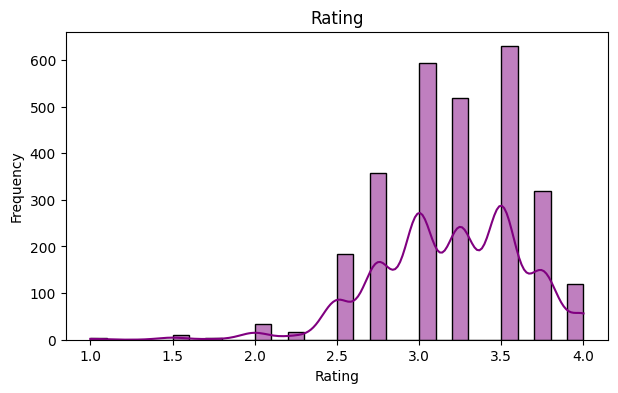

In [5]:
obs_cols = ['Cocoa Percent','Rating']

# Plot histograms for numerical columns only
for col in obs_cols:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(7, 4))
        color = {'Cocoa Percent': 'chocolate', 'Rating': 'purple'}.get(col, 'skyblue')
        sns.histplot(df[col], bins=30, color=color, kde=True)
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


<div style="color:black; font-size:1.5em">

📊 ***06 Initial Data Distribution for Categorical Columns***

</div>

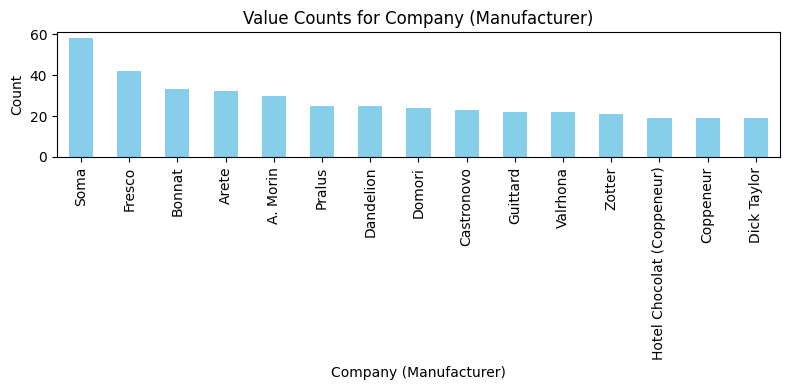


Value counts for 'Company (Manufacturer)':
 Company (Manufacturer)
Soma                          58
Fresco                        42
Bonnat                        33
Arete                         32
A. Morin                      30
Pralus                        25
Dandelion                     25
Domori                        24
Castronovo                    23
Guittard                      22
Valrhona                      22
Zotter                        21
Hotel Chocolat (Coppeneur)    19
Coppeneur                     19
Dick Taylor                   19
Name: count, dtype: int64


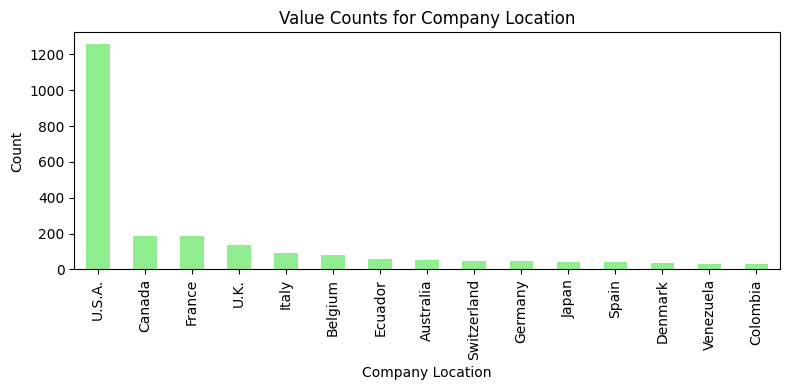


Value counts for 'Company Location':
 Company Location
U.S.A.         1260
Canada          188
France          187
U.K.            135
Italy            91
Belgium          78
Ecuador          58
Australia        53
Switzerland      47
Germany          46
Japan            43
Spain            41
Denmark          35
Venezuela        32
Colombia         31
Name: count, dtype: int64


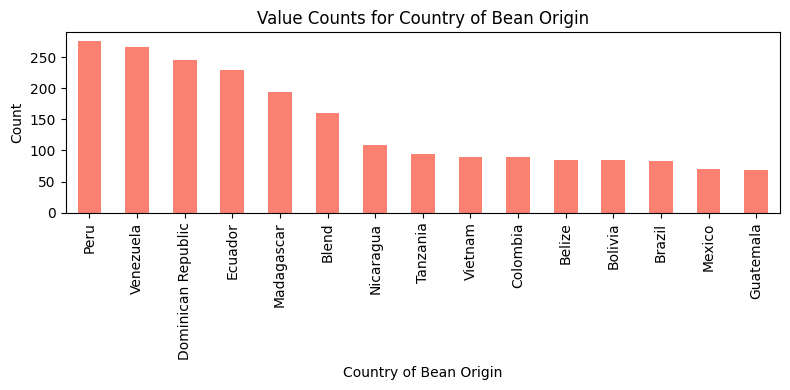


Value counts for 'Country of Bean Origin':
 Country of Bean Origin
Peru                  276
Venezuela             267
Dominican Republic    245
Ecuador               230
Madagascar            194
Blend                 161
Nicaragua             109
Tanzania               94
Vietnam                89
Colombia               89
Belize                 85
Bolivia                84
Brazil                 83
Mexico                 70
Guatemala              68
Name: count, dtype: int64


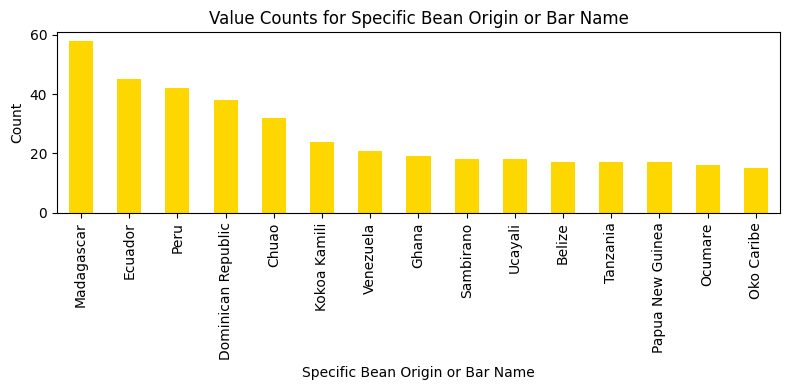


Value counts for 'Specific Bean Origin or Bar Name':
 Specific Bean Origin or Bar Name
Madagascar            58
Ecuador               45
Peru                  42
Dominican Republic    38
Chuao                 32
Kokoa Kamili          24
Venezuela             21
Ghana                 19
Sambirano             18
Ucayali               18
Belize                17
Tanzania              17
Papua New Guinea      17
Ocumare               16
Oko Caribe            15
Name: count, dtype: int64


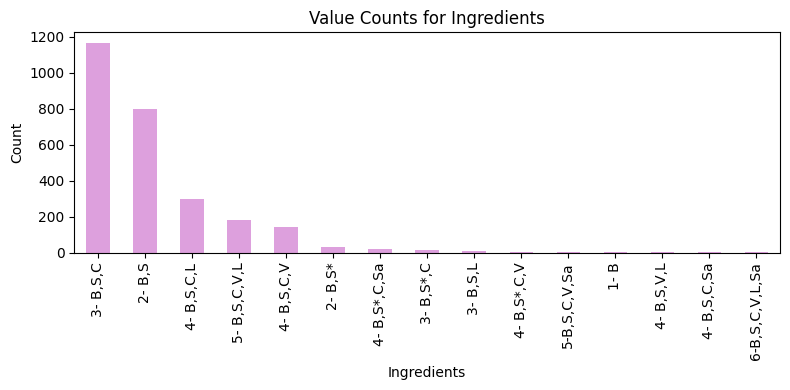


Value counts for 'Ingredients':
 Ingredients
3- B,S,C          1165
2- B,S             796
4- B,S,C,L         297
5- B,S,C,V,L       184
4- B,S,C,V         141
2- B,S*             31
4- B,S*,C,Sa        20
3- B,S*,C           14
3- B,S,L             8
4- B,S*,C,V          7
5-B,S,C,V,Sa         6
1- B                 6
4- B,S,V,L           5
4- B,S,C,Sa          5
6-B,S,C,V,L,Sa       4
Name: count, dtype: int64


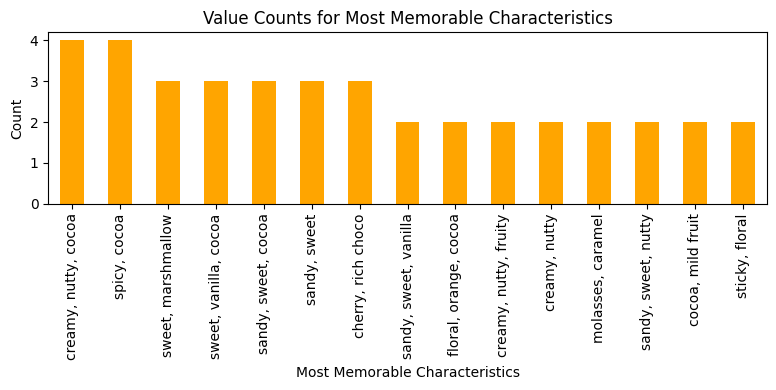


Value counts for 'Most Memorable Characteristics':
 Most Memorable Characteristics
creamy, nutty, cocoa     4
spicy, cocoa             4
sweet, marshmallow       3
sweet, vanilla, cocoa    3
sandy, sweet, cocoa      3
sandy, sweet             3
cherry, rich choco       3
sandy, sweet, vanilla    2
floral, orange, cocoa    2
creamy, nutty, fruity    2
creamy, nutty            2
molasses, caramel        2
sandy, sweet, nutty      2
cocoa, mild fruit        2
sticky, floral           2
Name: count, dtype: int64


In [6]:
# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns

# Define a list of colors to cycle through
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'plum', 'orange', 'teal', 'coral']

for idx, col in enumerate(categorical_cols):
    plt.figure(figsize=(8, 4))
    value_counts = df[col].value_counts().head(15)  # Show top 15 categories for readability
    value_counts.plot(kind='bar', color=colors[idx % len(colors)])
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
    print(f"\nValue counts for '{col}':\n", value_counts)

<div style="color:black; font-size:1em">

**Observations from Categorical Column Charts**

- **Company Location:**  
  The majority of chocolate companies are based in the USA, with notable representation from France and Canada.

- **Bean Origin:**  
  Most beans originate from countries like Venezuela, Ecuador, and Peru, indicating popular sources for cacao.

- **Ingredients:**  
  The most common ingredient combination is "B,S,C" (Bean, Sugar, Cocoa), showing a preference for simple recipes.

- **Most Memorable Characteristics:**  
  "Nutty", "fruity", and "earthy" are the most frequently mentioned characteristics, highlighting popular flavor profiles.

</div>

<div style="color:black; font-size:1.5em">

📊 ***07 Initial Data Transformation and Feature Engineering***

</div>

In [7]:
# Reload the DataFrame if df is None, then rename the column and show the updated DataFrame
if df is None:
	df = pd.read_csv('flavors_of_cacao.csv', encoding='latin1')
	df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

df = df.rename(columns={'Most Memorable Characteristics': 'Flavor Characteristics'})

# Add a column 'Cocoa Category' based on cocoa percent
def cocoa_category(percent):
    if percent < 50:
        return 'Milk'
    elif percent <= 85:
        return 'Dark'
    else:
        return 'Extra Dark'

df['Cocoa Category'] = df['Cocoa Percent'].apply(cocoa_category)

# Add a column 'Rating Category' based on rating value
def rating_category(rating):
    if rating < 2.5:
        return 'Low'
    elif rating <= 3.5:
        return 'Medium'
    else:
        return 'High'

df['Rating Category'] = df['Rating'].apply(rating_category)
df.head()

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Flavor Characteristics,Rating,Cocoa Category,Rating Category
0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70.0,"2- B,S","chalky, fragrant, then off",2.50,Dark,Medium
1,999,Bahen & Co.,Australia,2012,Brazil,Bahia,70.0,"2- B,S","chalky, intense, chemical",2.50,Dark,Medium
2,999,Mast Brothers,U.S.A.,2012,Blend,Madagascar,72.0,"2- B,S","gritty, overly tart, sour",2.50,Dark,Medium
3,999,Mast Brothers,U.S.A.,2012,Venezuela,Chuao,73.0,"2- B,S","gritty, sour, sweet",2.75,Dark,Medium
4,995,Bahen & Co.,Australia,2012,Madagascar,Sambirano,70.0,"2- B,S","unrefined, flat, grassy",3.00,Dark,Medium


<div style="color:black; font-size:1.5em">

📊 ***08 Initial Visualizations***

</div>

<div style="color:black; font-size:1em">

**Cocoa Percent Distribution by Rating Category**  
*Goal:* Comparing the distribution of cocoa percent across chocolate bars grouped by rating category, using color to highlight each group.

</div>

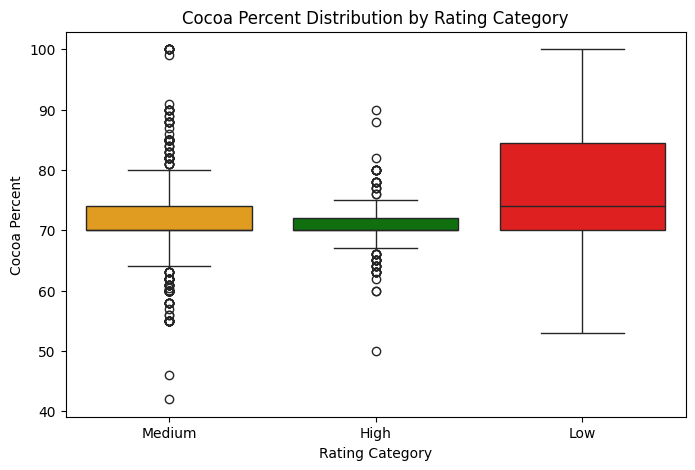

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='Rating Category',
    y='Cocoa Percent',
    hue='Rating Category',  # Assigns color by Rating Category
    palette={'Low': 'red', 'Medium': 'orange', 'High': 'green'}
)
plt.title('Cocoa Percent Distribution by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Cocoa Percent')
plt.show()

<div style="color:black; font-size:1em">

**Top 10 Companies vs Top 10 Locations**  
*Goal:*  Visualize the frequency of chocolate bar ratings produced by the most prominent companies in the most represented locations, helping to identify patterns or concentrations of production across these leading groups.

</div>

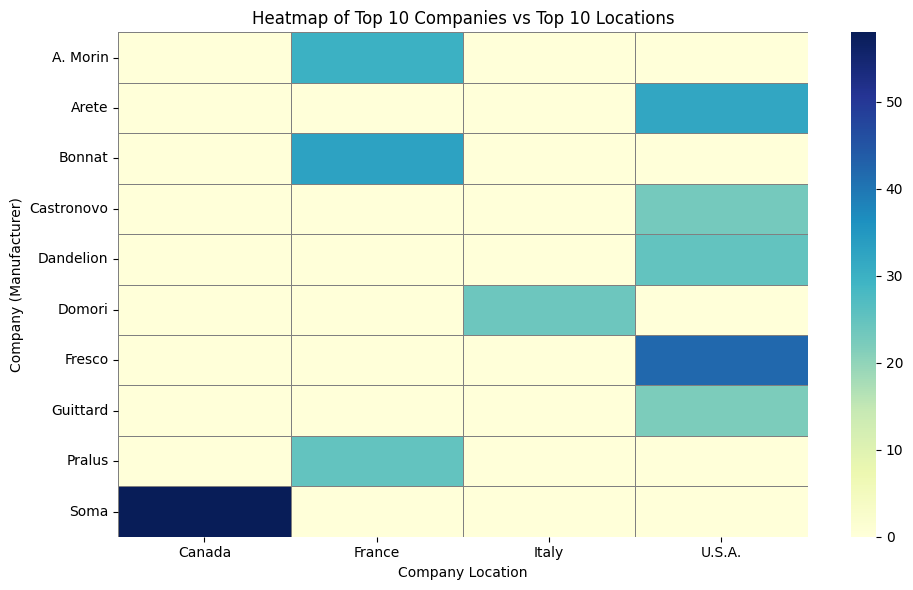

In [9]:
# Get top 10 companies and top 10 locations by frequency
top_companies = df['Company (Manufacturer)'].value_counts().head(10).index
top_locations = df['Company Location'].value_counts().head(10).index

# Filter the DataFrame
df_top = df[df['Company (Manufacturer)'].isin(top_companies) & df['Company Location'].isin(top_locations)]

# Create the pivot table for only the top 10 of each
company_location_pivot = pd.pivot_table(
    df_top,
    index='Company (Manufacturer)',
    columns='Company Location',
    values='Rating',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    company_location_pivot,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Heatmap of Top 10 Companies vs Top 10 Locations')
plt.xlabel('Company Location')
plt.ylabel('Company (Manufacturer)')
plt.tight_layout()
plt.show()

<div style="color:black; font-size:1.1em">

# **Summary of Results**

- Most chocolate bars are dark chocolate, with cocoa percent skewed toward higher values.
- Ratings are tightly clustered, with few extreme scores, and common flavor notes include "nutty," "fruity," and "earthy."
- The distribution of cocoa percent varies by rating category, suggesting some relationship between cocoa content and perceived quality.
- The heatmap of top companies and locations reveals production concentrations and highlights which companies and regions are most active in the premium chocolate market.

</div>